In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


In [36]:
# 데이터 불러오기
raw_data = pd.read_csv('ambulance.csv',encoding='CP949')
data = raw_data
# print(data.shape)
# print(data.index)
# print(data.columns)
data

,지역별,구급차 소계,구급차 특수,구급차 일반,인력 소계,1급 응급구조사,2급 응급구조사,의사/간호사,인구,시/도
0,전체,7740,3427,4313,21594,7243,3721,10630,51849861,시
1,서울,803,363,440,2196,803,553,840,9729107,시
2,부산,432,135,297,1433,231,207,995,3413841,시
3,대구,309,103,206,1004,246,165,593,2438031,시
4,인천,332,127,205,1109,517,96,496,2957026,시
5,광주,246,75,171,737,317,43,377,1456468,시
6,대전,181,60,121,947,221,73,653,1474870,시
7,울산,126,52,74,470,103,62,305,1148019,시
8,세종,43,24,19,146,63,14,69,340575,시
9,경기,1846,783,1063,4041,1540,363,2138,13239666,도


In [37]:
ambul = pd.DataFrame({
    "지역별" : data["지역별"],
    "구급차 소계" : data["구급차 소계"],
    "구급차 특수" : data["구급차 특수"],
    "구급차 일반" : data["구급차 일반"],
    "인구별 구급차수": (data["구급차 소계"]/data["인구"]),
    "시/도": data["시/도"]
})
sorted_ambul = ambul.sort_values(['구급차 소계','구급차 특수','구급차 일반'] ,ascending = [False, False, False])
# print(ambul)
# print(ambul.sum())
ambul_nosum = ambul[1:]
# print(ambul_nosum)

In [39]:
print(float(ambul[ambul['지역별'] == '서울']["인구별 구급차수"]))
# print(ambul.loc["1"])

8.25358380784588e-05


In [42]:
medic = pd.DataFrame({
    "지역별" : data["지역별"],
    "인력 소계" : data["인력 소계"],
    "1급 응급구조사" : data["1급 응급구조사"],
    "2급 응급구조사" : data["2급 응급구조사"],
    "의사/간호사" : data["의사/간호사"],
    "인구별 의료인력수": (data["인력 소계"]/data["인구"]),
    "시/도": data["시/도"]
})
sorted_medic = medic.sort_values(['인력 소계','1급 응급구조사','2급 응급구조사',"의사/간호사"] ,ascending = [False, False, False, False])
# print(medic)
medic_nosum = medic[1:]
# print(medic_nosum)

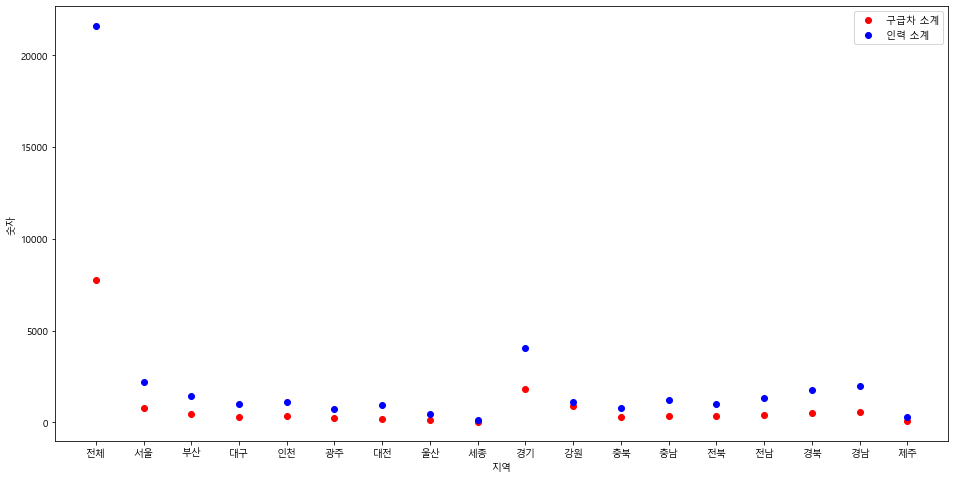

In [43]:
plt.figure(figsize=(16,8))
plt.scatter(data = ambul, x = "지역별", y = "구급차 소계", color='red')
plt.scatter(data = medic, x = "지역별", y = "인력 소계", color='blue')
plt.xlabel('지역')
plt.ylabel('숫자')
plt.legend(loc='upper right')
plt.show()

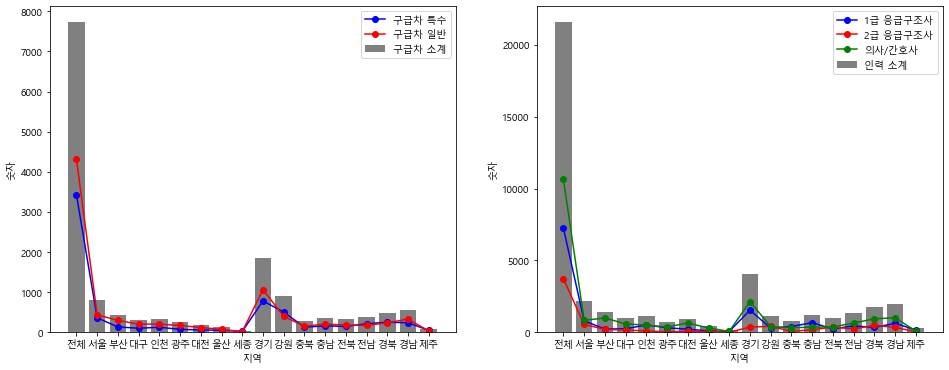

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].bar(x=ambul['지역별'], height=ambul['구급차 소계'], color='grey', label='구급차 소계')
axes[0].plot(ambul['지역별'], ambul['구급차 특수'], marker='o', color='blue', label='구급차 특수')
axes[0].plot(ambul['지역별'], ambul['구급차 일반'], marker='o', color='red', label='구급차 일반')
# axes[0].plot(ambul['지역별'], ambul['인구별 구급차수'], marker='o', color='yellow', label='인구별 구급차수')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('숫자')
axes[0].legend(loc='upper right')

axes[1].bar(x=medic['지역별'], height=medic['인력 소계'], color='grey', label='인력 소계')
axes[1].plot(medic['지역별'], medic['1급 응급구조사'], marker='o', color='blue', label='1급 응급구조사')
axes[1].plot(medic['지역별'], medic['2급 응급구조사'], marker='o', color='red', label='2급 응급구조사')
axes[1].plot(medic['지역별'], medic['의사/간호사'], marker='o', color='green', label='의사/간호사')
# axes[1].plot(medic['지역별'], medic['인구별 의료인력수'], marker='o', color='yellow', label='인구별 의료인력수')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('숫자')
axes[1].legend(loc='upper right')



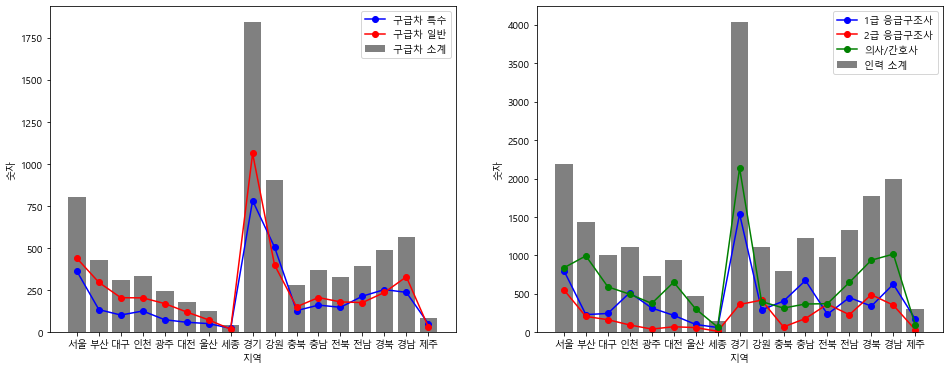

In [45]:
# 전체 없는 버젼
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].bar(x=ambul_nosum['지역별'], height=ambul_nosum['구급차 소계'], color='grey', label='구급차 소계')
axes[0].plot(ambul_nosum['지역별'], ambul_nosum['구급차 특수'], marker='o', color='blue', label='구급차 특수')
axes[0].plot(ambul_nosum['지역별'], ambul_nosum['구급차 일반'], marker='o', color='red', label='구급차 일반')
# axes[0].plot(ambul_nosum['지역별'], ambul_nosum['인구별 구급차수'], marker='o', color='yellow', label='인구별 구급차수')
# axes[0].plot(data['지역별'], data['인구']/40000, marker='o', color='black', label='인구')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('숫자')
axes[0].legend(loc='upper right')

axes[1].bar(x=medic_nosum['지역별'], height=medic_nosum['인력 소계'], color='grey', label='인력 소계')
axes[1].plot(medic_nosum['지역별'], medic_nosum['1급 응급구조사'], marker='o', color='blue', label='1급 응급구조사')
axes[1].plot(medic_nosum['지역별'], medic_nosum['2급 응급구조사'], marker='o', color='red', label='2급 응급구조사')
axes[1].plot(medic_nosum['지역별'], medic_nosum['의사/간호사'], marker='o', color='green', label='의사/간호사')
# axes[1].plot(medic_nosum['지역별'], medic_nosum['인구별 의료인력수'], marker='o', color='yellow', label='인구별 의료인력수')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('숫자')
axes[1].legend(loc='upper right')



Text(0, 0.5, '비율')

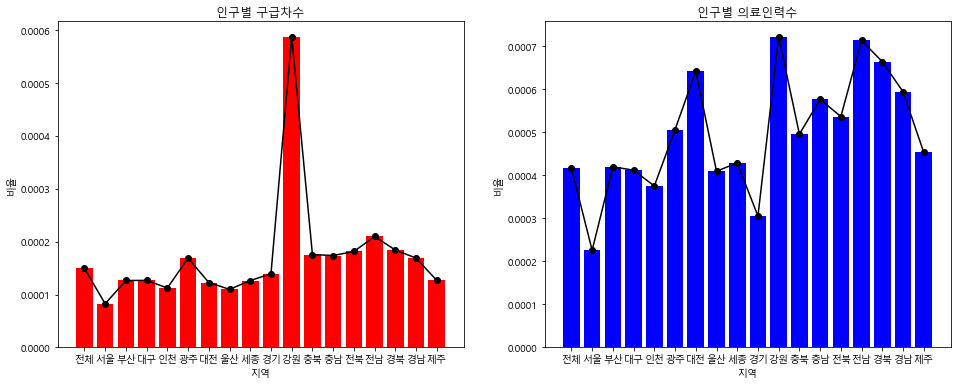

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
axes[0].set_title("인구별 구급차수")
axes[0].plot(ambul['지역별'], ambul['인구별 구급차수'], marker='o', color='black')
axes[0].bar(data = ambul, x='지역별', height = "인구별 구급차수", color='red')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('비율')

axes[1].set_title("인구별 의료인력수")
axes[1].plot(medic['지역별'], medic['인구별 의료인력수'], marker='o', color='black')
axes[1].bar(data = medic, x='지역별', height = "인구별 의료인력수", color='blue')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('비율')


In [20]:
# ambul.to_csv('./ambul.csv', sep=',', na_rep='NaN',encoding='CP949')
# medic.to_csv('./medic.csv', sep=',', na_rep='NaN',encoding='CP949')


In [50]:
# 전체 평균, 시평균, 도평균 구하기

ambul_si = ambul_nosum[0:8]
ambul_do = ambul_nosum[8:]
ambul_average = sum(ambul_nosum["인구별 구급차수"]) / len(ambul_nosum)
ambul_si_average = sum(ambul_si["인구별 구급차수"]) / len(ambul_si)
ambul_do_average = sum(ambul_do["인구별 구급차수"]) / len(ambul_do)

print("의료인력의 전체평균: ", ambul_average)
print("의료인력의 시평균: ", ambul_si_average)
print("의료인력의 도평균: ", ambul_do_average)

의료인력의 전체평균:  0.0001719558881669748
의료인력의 시평균:  0.0001219664858762593
의료인력의 도평균:  0.0002163909124253886


In [48]:
# 전체 평균, 시평균, 도평균 구하기

medic_si = medic_nosum[0:8]
medic_do = medic_nosum[8:]
medic_average = sum(medic_nosum["인구별 의료인력수"]) / len(medic_nosum)
medic_si_average = sum(medic_si["인구별 의료인력수"]) / len(medic_si)
medic_do_average = sum(medic_do["인구별 의료인력수"]) / len(medic_do)

print("의료인력의 전체평균: ", medic_average)
print("의료인력의 시평균: ", medic_si_average)
print("의료인력의 도평균: ", medic_do_average)

0.0004987553962784455
0.0004273149703055491
0.0005622579971432423


In [61]:
# 점수화 부분
import scipy.stats as ss
ambul_list = ambul_nosum["인구별 구급차수"]
ambul_nosum["정규분포화"] = ss.zscore(ambul_list)
ambul_nosum['밀도'] = ss.norm.cdf(ambul_nosum['정규분포화'])
ambul_nosum['점수'] = (ambul_nosum['밀도']*100).astype(int)


print(ambul_nosum)

   지역별  구급차 소계  구급차 특수  구급차 일반  인구별 구급차수 시/도     정규분포화        밀도  점수
1   서울     803     363     440  0.000083   시 -0.820864  0.205862  20
2   부산     432     135     297  0.000127   시 -0.416878  0.338384  33
3   대구     309     103     206  0.000127   시 -0.415061  0.339049  33
4   인천     332     127     205  0.000112   시 -0.547863  0.291893  29
5   광주     246      75     171  0.000169   시 -0.028037  0.488817  48
6   대전     181      60     121  0.000123   시 -0.451954  0.325651  32
7   울산     126      52      74  0.000110   시 -0.571002  0.283999  28
8   세종      43      24      19  0.000126   시 -0.419509  0.337422  33
9   경기    1846     783    1063  0.000139   도 -0.298588  0.382627  38
10  강원     906     506     400  0.000588   도  3.816826  0.999932  99
11  충북     281     129     152  0.000176   도  0.033675  0.513432  51
12  충남     369     162     207  0.000174   도  0.016494  0.506580  50
13  전북     330     149     181  0.000181   도  0.086940  0.534640  53
14  전남     392     215     177  0.

In [62]:
# 점수화 부분
medic_list = medic_nosum["인구별 의료인력수"]
medic_nosum["정규분포화"] = ss.zscore(medic_list)
medic_nosum['밀도'] = ss.norm.cdf(medic_nosum['정규분포화'])
medic_nosum['점수'] = (medic_nosum['밀도']*100).astype(int)


print(medic_nosum)

   지역별  인력 소계  1급 응급구조사  2급 응급구조사  의사/간호사  인구별 의료인력수 시/도     정규분포화        밀도  \
1   서울   2196       803       553     840   0.000226   시 -2.001283  0.022681   
2   부산   1433       231       207     995   0.000420   시 -0.578992  0.281297   
3   대구   1004       246       165     593   0.000412   시 -0.637292  0.261967   
4   인천   1109       517        96     496   0.000375   시 -0.906793  0.182258   
5   광주    737       317        43     377   0.000506   시  0.053237  0.521228   
6   대전    947       221        73     653   0.000642   시  1.050590  0.853276   
7   울산    470       103        62     305   0.000409   시 -0.654933  0.256255   
8   세종    146        63        14      69   0.000429   시 -0.513575  0.303774   
9   경기   4041      1540       363    2138   0.000305   도 -1.418544  0.078016   
10  강원   1113       293       419     401   0.000722   도  1.636464  0.949129   
11  충북    793       406        71     316   0.000496   도 -0.022960  0.490841   
12  충남   1224       675       180     36

In [30]:
# json 형태로 만들어주는 부분
locations = ["서울","부산","대구","인천","광주",
             "대전","울산","세종","경기",
             "강원","충북","충남","전북",
             "전남","경북","경남","제주"]
metro = ["서울","부산","대구","인천","광주",
             "대전","울산","세종"]
suburb = ["경기","강원","충북","충남","전북",
             "전남","경북","경남","제주"]

#보내야되는 형태 [{'name': '경기', '시 metro': 843, '도 suburb': 1040},... {'name': '충남', 'metro': 876, 'suburb': 921}, ...]

# print(ambul_nosum)
ambul_result = []
for location in locations:
    temp = float(ambul_nosum[ambul_nosum["지역별"] == location]["인구별 구급차수"])
#     print(temp)
    if location in metro:
        final_temp = {
            "name" : location,
            "metro" : temp,
            "suburb" : 0.
        }
        ambul_result.append(final_temp)
    else:
        final_temp = {
            "name" : location,
            "metro" : 0.,
            "suburb" : temp
        }
        ambul_result.append(final_temp)

print(ambul_result)

[{'name': '서울', 'metro': 8.25358380784588e-05, 'suburb': 0.0}, {'name': '부산', 'metro': 0.00012654367909929021, 'suburb': 0.0}, {'name': '대구', 'metro': 0.000126741620594652, 'suburb': 0.0}, {'name': '인천', 'metro': 0.00011227496816057755, 'suburb': 0.0}, {'name': '광주', 'metro': 0.00016890175410650971, 'suburb': 0.0}, {'name': '대전', 'metro': 0.00012272268064303973, 'suburb': 0.0}, {'name': '울산', 'metro': 0.00010975428107026103, 'suburb': 0.0}, {'name': '세종', 'metro': 0.00012625706525728548, 'suburb': 0.0}, {'name': '경기', 'metro': 0.0, 'suburb': 0.0001394294992033787}, {'name': '강원', 'metro': 0.0, 'suburb': 0.0005877384524963315}, {'name': '충북', 'metro': 0.0, 'suburb': 0.00017562423164398656}, {'name': '충남', 'metro': 0.0, 'suburb': 0.00017375261864973027}, {'name': '전북', 'metro': 0.0, 'suburb': 0.00018142664013806017}, {'name': '전남', 'metro': 0.0, 'suburb': 0.00020976644753564557}, {'name': '경북', 'metro': 0.0, 'suburb': 0.00018418237280913005}, {'name': '경남', 'metro': 0.0, 'suburb': 0.0001

In [64]:
# print(medic_nosum)
medic_result = []
for location in locations:
    temp = float(medic_nosum[medic_nosum["지역별"] == location]["인구별 의료인력수"])
    if location in metro:
        final_temp = {
            "name" : location,
            "metro" : temp,
            "suburb" : 0.
        }
        medic_result.append(final_temp)
    else:
        final_temp = {
            "name" : location,
            "metro" : 0.,
            "suburb" : temp
        }
        medic_result.append(final_temp)
print(medic_result)

[{'name': '서울', 'metro': 0.00022571444635155108, 'suburb': 0.0}, {'name': '부산', 'metro': 0.0004197617873825993, 'suburb': 0.0}, {'name': '대구', 'metro': 0.0004118077251683838, 'suburb': 0.0}, {'name': '인천', 'metro': 0.000375038974970122, 'suburb': 0.0}, {'name': '광주', 'metro': 0.0005060186698231612, 'suburb': 0.0}, {'name': '대전', 'metro': 0.0006420904893312631, 'suburb': 0.0}, {'name': '울산', 'metro': 0.00040940088970652924, 'suburb': 0.0}, {'name': '세종', 'metro': 0.00042868677971078325, 'suburb': 0.0}, {'name': '경기', 'metro': 0.0, 'suburb': 0.00030521918000046225}, {'name': '강원', 'metro': 0.0, 'suburb': 0.0007220230658150298}, {'name': '충북', 'metro': 0.0, 'suburb': 0.0004956228316501115}, {'name': '충남', 'metro': 0.0, 'suburb': 0.0005763501496673979}, {'name': '전북', 'metro': 0.0, 'suburb': 0.0005365830326507476}, {'name': '전남', 'metro': 0.0, 'suburb': 0.0007133129453189172}, {'name': '경북', 'metro': 0.0, 'suburb': 0.0006639568225502244}, {'name': '경남', 'metro': 0.0, 'suburb': 0.0005941913

In [34]:
with open('ambul.json', 'w', encoding='UTF-8') as file:
    jsonified = json.dumps(ambul_result)
    file.write(jsonified)
    
with open('medic.json', 'w', encoding='UTF-8') as file:
    jsonified = json.dumps(medic_result)
    file.write(jsonified)
    

In [54]:
# json 읽어오는 부분
with open('ambul.json') as file:
    json_string = file.read()    
    ambul = json.loads(json_string)

total_ambul_avg = 0
city_ambul_avg = 0
suburb_ambul_avg = 0

for item in ambul:
    city_ambul_avg += item['metro']
    suburb_ambul_avg += item['suburb']
    
total_ambul_avg = (city_ambul_avg + suburb_ambul_avg) / len(ambul)
city_ambul_avg = city_ambul_avg / 8
suburb_ambul_avg = suburb_ambul_avg / 9

print(total_ambul_avg)
print(city_ambul_avg)
print(suburb_ambul_avg)
# 위에껏과 검증 완료

0.00017195588816697478
0.0001219664858762593
0.0002163909124253886


In [55]:
# json 읽어오는 부분
with open('medic.json') as file:
    json_string = file.read()    
    medic = json.loads(json_string)

total_medic_avg = 0
city_medic_avg = 0
suburb_medic_avg = 0

for item in medic:
    city_medic_avg += item['metro']
    suburb_medic_avg += item['suburb']
    
total_medic_avg = (city_medic_avg + suburb_medic_avg) / len(medic)
city_medic_avg = city_medic_avg / 8
suburb_medic_avg = suburb_medic_avg / 9

print(total_medic_avg)
print(city_medic_avg)
print(suburb_medic_avg)
# 위에껏과 검증 완료

0.0004987553962784454
0.0004273149703055491
0.0005622579971432423
